In this notebook, I examine snow quality data in order to find data files with the greates amount of snow. In order to use this notebook, place individual station files from the Climate Database Online (for more information, see clean_weather.ipynb) into the folder `"../../SharedData/Weather (1990-2019)/individual"`. The notebook will automatically iterate over these files and output the quantity of missing snow data in units of years to the dataframe `missing_snow_df`.

As it stands, improving snow data appears unlikely to improve the synthetic control model. This code may be used to examine snow data more closely in the future, but for now is not used.

In [56]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
files_root = os.path.join("..", "SharedData", "Weather (1990-2019)", "individual")
os.listdir(files_root)

['USW00026451.csv', 'USW00023160.csv', 'USW00023232.csv', 'USW00013876.csv']

,state,snow
0,AK,0.000000
0,AZ,0.666667
0,CA,21.583333
0,AL,0.250000


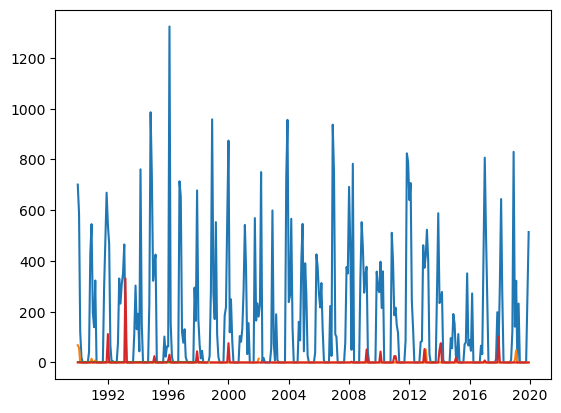

In [58]:
missing_years_snow = []

for fi_name in os.listdir(files_root):
    fi = os.path.join(files_root, str(fi_name))
    df = pd.read_csv(fi)
    df["date"] = pd.to_datetime(df.DATE, format="%Y-%m")
    df = df[(df.date.dt.year >= 1990)&(df.date.dt.year<2020)]
    df["state"] = df.NAME.str[-5:-3]
    df["snow"] = df.SNOW
    missing_years_snow.append(df.groupby("state", as_index=False).agg({"snow": lambda x: x.isna().sum() / 12}))
    plt.plot(df.date, df.snow)

missing_snow_df = pd.concat(missing_years_snow)
missing_snow_df